In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import random as random

In [2]:
df=pd.read_csv('checkpoint_3.csv')
df['ListingByYear'] = df.apply(lambda row: row.month[:4], axis = 1)

display(df)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,...,closest_Uni_sch_dist,closest_Uni_sch,num_Uni_sch_1km_radius,closest_mall_dist,closest_mall,num_mall_1km_radius,closest_park_dist,closest_park,num_park_1km_radius,ListingByYear
0,0,0,0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,...,7408.201434,Singapore Management University,0,1013.992058,AMK Hub,0,1032.586022,Ang Mo Kio Town Garden East,0,2017
1,1,1,1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,2017-01,...,8371.125772,Singapore University of Social Sciences,0,894.265975,Broadway Plaza,1,658.451197,Ang Mo Kio Town Garden West,2,2017
2,2,2,2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,2017-01,...,8802.805943,Singapore University of Social Sciences,0,1525.573038,Broadway Plaza,0,1111.238041,Ang Mo Kio Town Garden West,0,2017
3,3,3,3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,2017-01,...,7897.637286,Singapore Management University,0,893.795634,myVillage At Serangoon Garden,1,898.087299,Ang Mo Kio Town Garden East,1,2017
4,4,4,4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,2017-01,...,8807.296192,Singapore University of Social Sciences,0,1569.306143,Broadway Plaza,0,1155.199842,Ang Mo Kio Town Garden West,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149321,149321,149321,149321,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN CTRL,800000.0,2023-03,...,13379.711491,Singapore University of Social Sciences,0,432.877723,Junction Nine,2,279.490328,Yishun Pond Park,1,2023
149322,149322,149322,149322,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN RING RD,800000.0,2023-03,...,13232.047301,Singapore University of Social Sciences,0,931.337725,Wisteria Mall,2,661.649827,Yishun Pond Park,1,2023
149323,149323,149323,149323,YISHUN,EXECUTIVE,Apartment,142.0,YISHUN RING RD,770000.0,2023-03,...,13428.149563,Singapore Institute of Technology,0,739.745345,Junction Nine,1,825.343534,Yishun Pond Park,1,2023
149324,149324,149324,149324,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN RING RD,818000.0,2023-03,...,11979.803115,Singapore University of Social Sciences,0,965.509600,Northpoint City,1,976.514291,Sembawang Park,1,2023


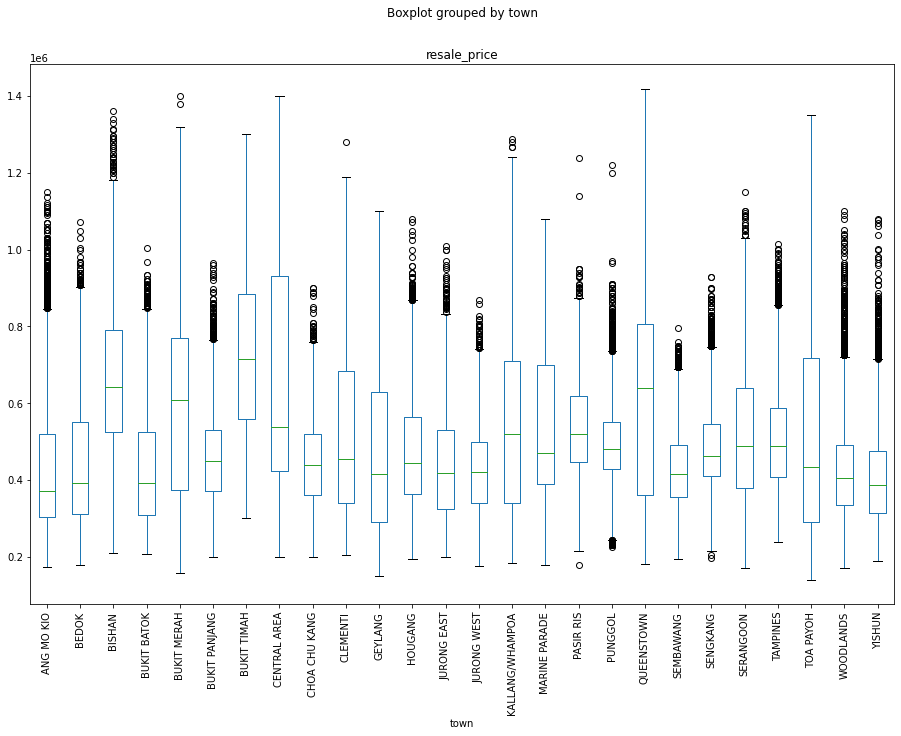

In [3]:
bpbytown=df.boxplot(by ='town', column =['resale_price'], grid = False, figsize =(15, 10))

plt.xticks(rotation=90)
plt.show()

<Figure size 432x288 with 0 Axes>

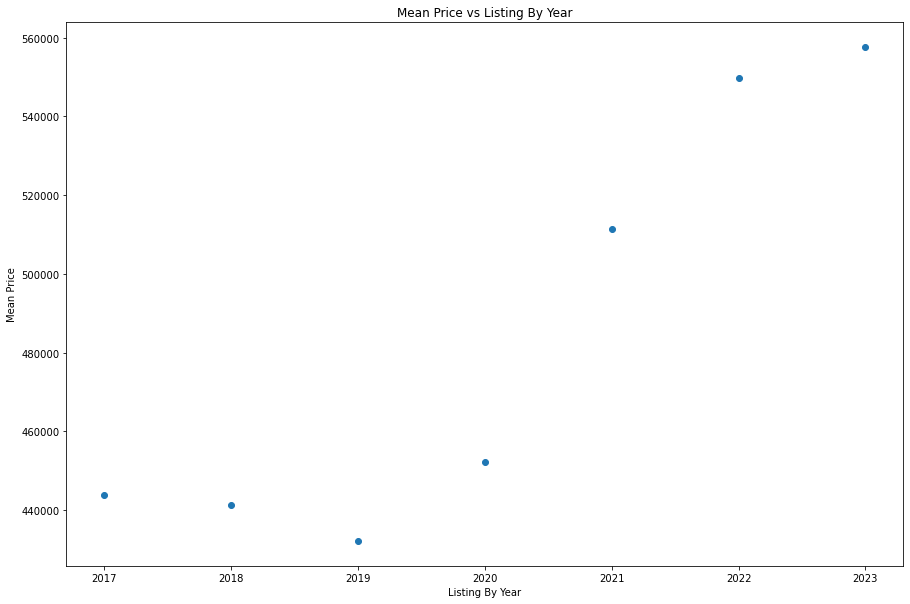

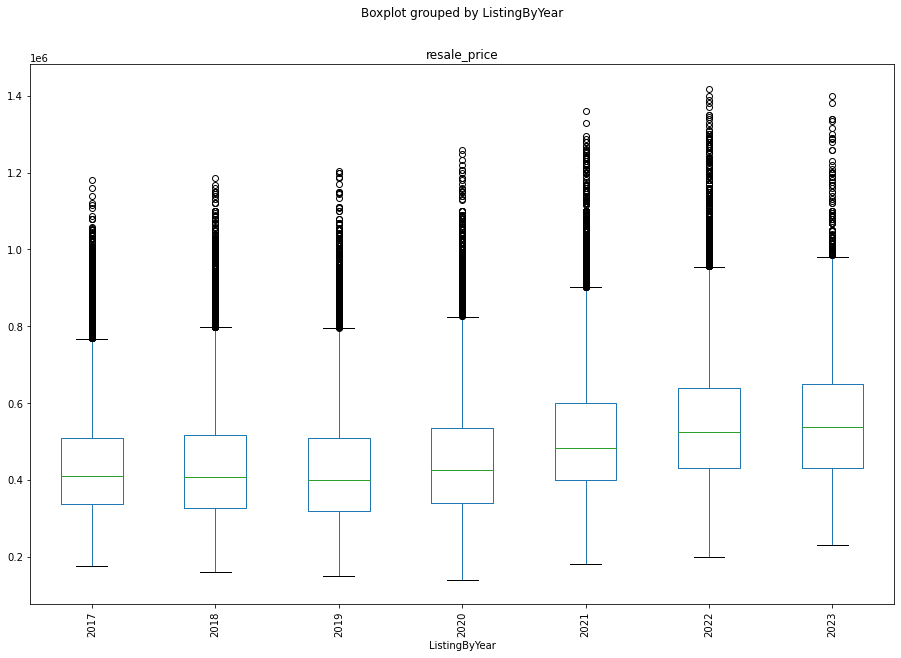

In [4]:
meanleasebyyear = df.groupby(['ListingByYear']).aggregate(np.mean)

plt.clf()
plt.figure(figsize=(15,10))
plt.scatter(meanleasebyyear.index,meanleasebyyear['resale_price'])
plt.title('Mean Price vs Listing By Year')
plt.ylabel('Mean Price')
plt.xlabel('Listing By Year')
plt.show()

leasebyyear=df.boxplot(by ='ListingByYear', column =['resale_price'], grid = False, figsize =(15, 10))
plt.xticks(rotation=90)
plt.show()

# display(meanleasebyyear)

<Figure size 432x288 with 0 Axes>

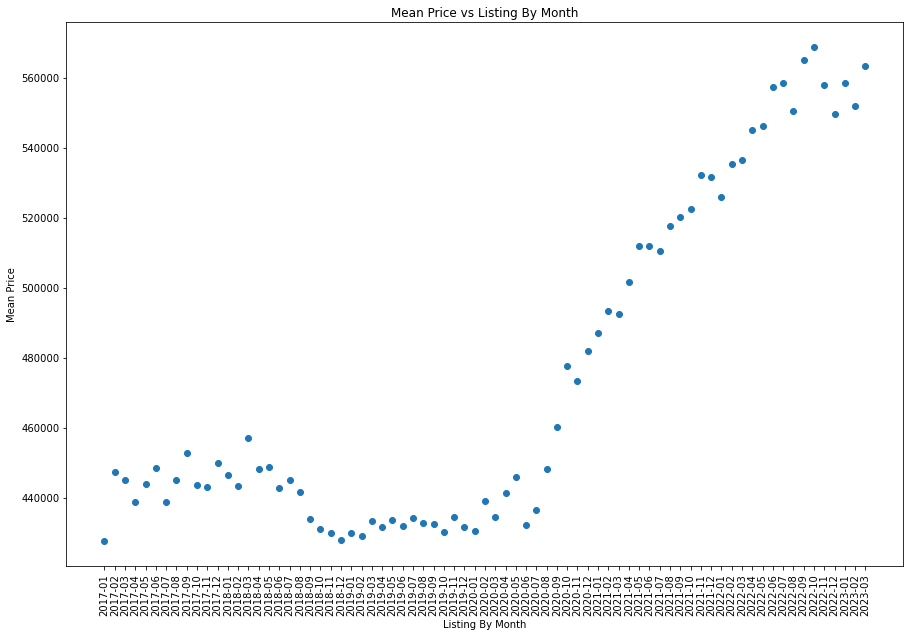

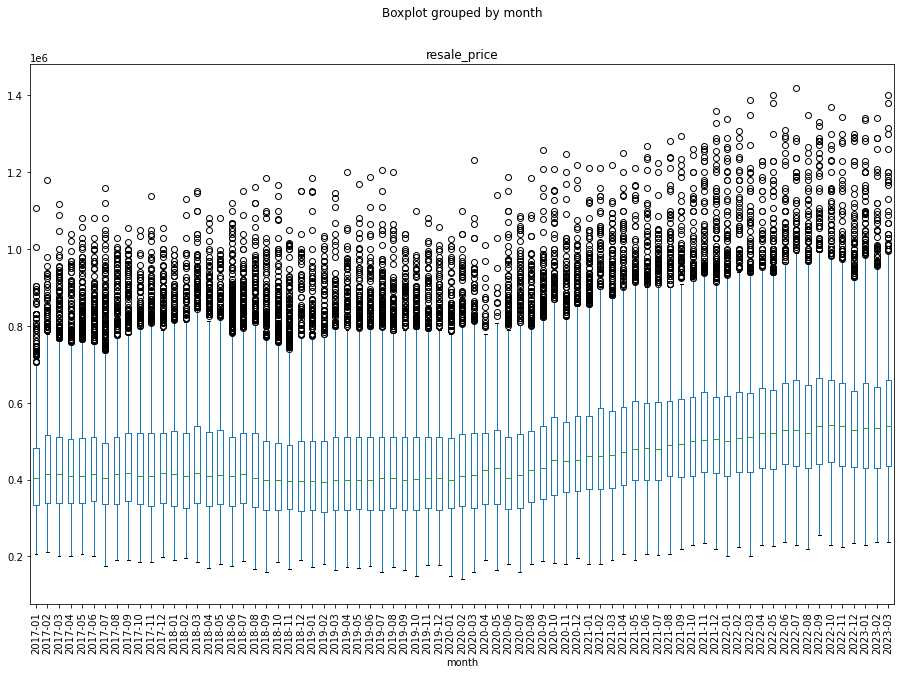

In [5]:
meanleasebymonth = df.groupby(['month']).aggregate(np.mean)

plt.clf()
plt.figure(figsize=(15,10))
plt.scatter(meanleasebymonth.index,meanleasebymonth['resale_price'])
plt.title('Mean Price vs Listing By Month')
plt.ylabel('Mean Price')
plt.xlabel('Listing By Month')
plt.xticks(rotation=90)
plt.show()

leasebymonthbp=df.boxplot(by ='month', column =['resale_price'], grid = False, figsize =(15, 10))
plt.xticks(rotation=90)
plt.show()

# display(meanleasebyyear)

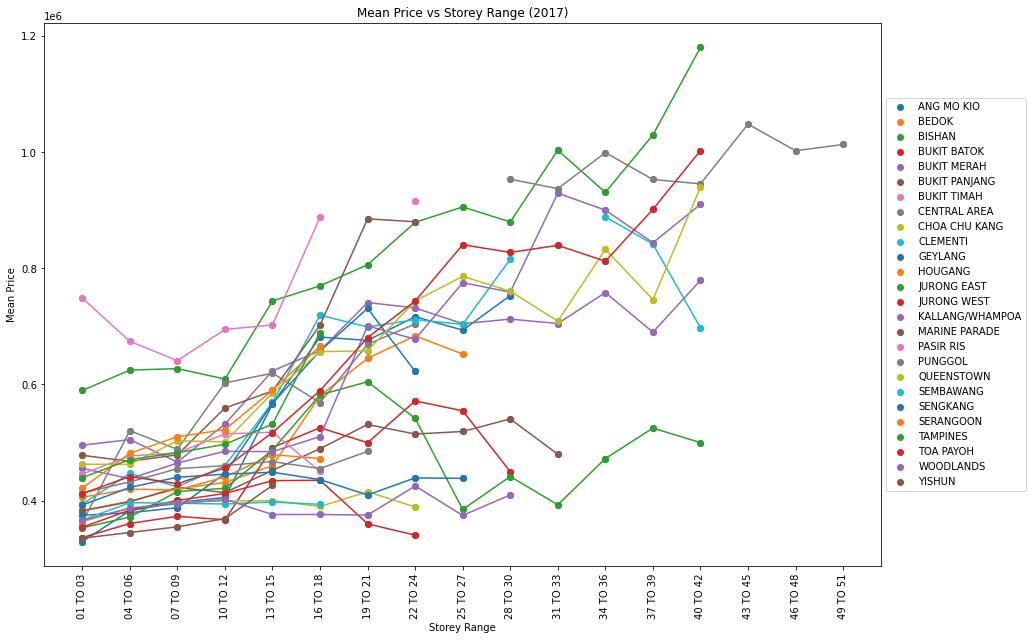

In [6]:
#Getting the storey_range and town graphs
df2017=df.loc[df['ListingByYear']=='2017']
# print(df2017['month'].unique())
meanpricebystorey = df2017.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.scatter(newdf.index, newdf[i], label=i)
    plt.plot(newdf.index, newdf[i], '-o')


plt.title('Mean Price vs Storey Range (2017)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2018-05' '2018-08' '2018-01' '2018-02' '2018-03' '2018-04' '2018-06'
 '2018-07' '2018-09' '2018-10' '2018-11' '2018-12']


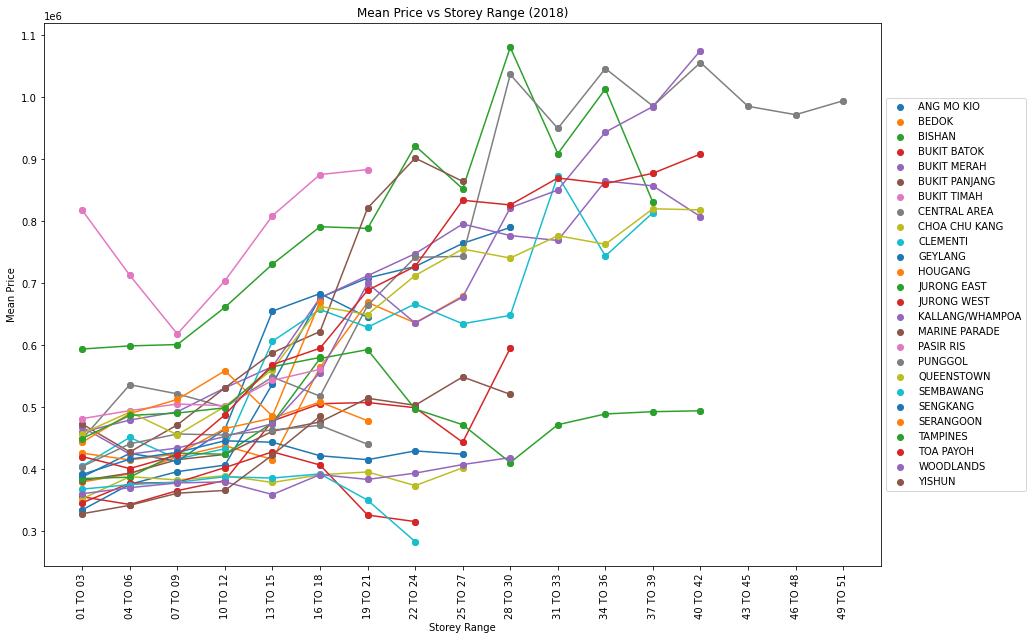

In [7]:
#Getting the storey_range and town graphs
df2018=df.loc[df['ListingByYear']=='2018']
print(df2018['month'].unique())
meanpricebystorey = df2018.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.scatter(newdf.index, newdf[i], label=i)
    plt.plot(newdf.index, newdf[i], '-o')


plt.title('Mean Price vs Storey Range (2018)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2019-04' '2019-01' '2019-02' '2019-03' '2019-05' '2019-06' '2019-07'
 '2019-08' '2019-09' '2019-10' '2019-11' '2019-12']


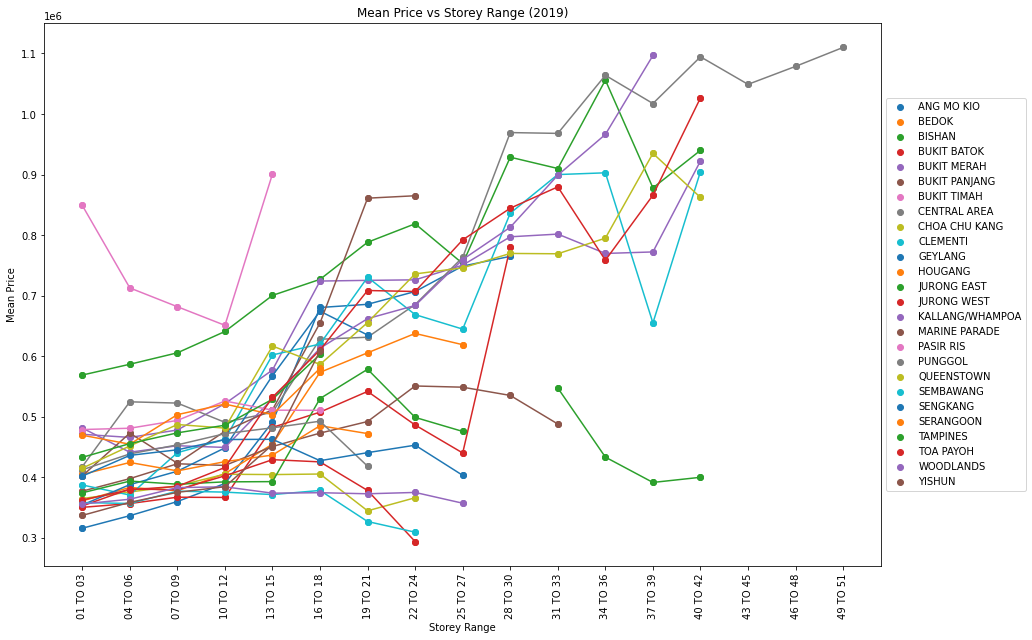

In [8]:
#Getting the storey_range and town graphs
df2019=df.loc[df['ListingByYear']=='2019']
print(df2019['month'].unique())
meanpricebystorey = df2019.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.scatter(newdf.index, newdf[i], label=i)
    plt.plot(newdf.index, newdf[i], '-o')


plt.title('Mean Price vs Storey Range (2019)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2020-04' '2020-08' '2020-01' '2020-02' '2020-03' '2020-05' '2020-06'
 '2020-07' '2020-09' '2020-10' '2020-11' '2020-12']


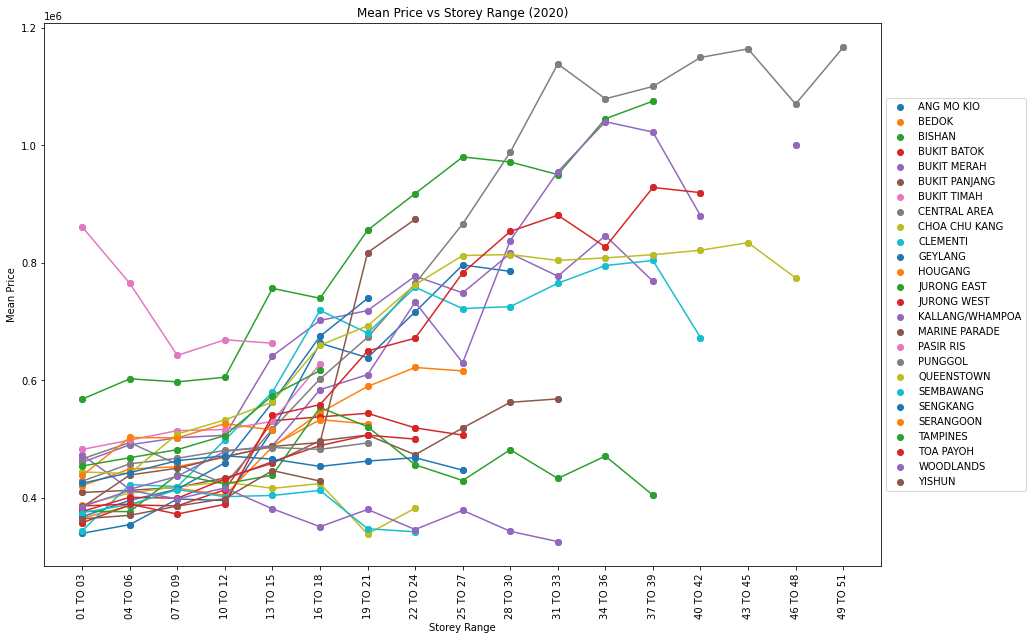

In [9]:
#Getting the storey_range and town graphs
df2020=df.loc[df['ListingByYear']=='2020']
print(df2020['month'].unique())
meanpricebystorey = df2020.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.scatter(newdf.index, newdf[i], label=i)
    plt.plot(newdf.index, newdf[i], '-o')


plt.title('Mean Price vs Storey Range (2020)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2021-01' '2021-02' '2021-03' '2021-04' '2021-05' '2021-06' '2021-07'
 '2021-08' '2021-09' '2021-10' '2021-11' '2021-12']


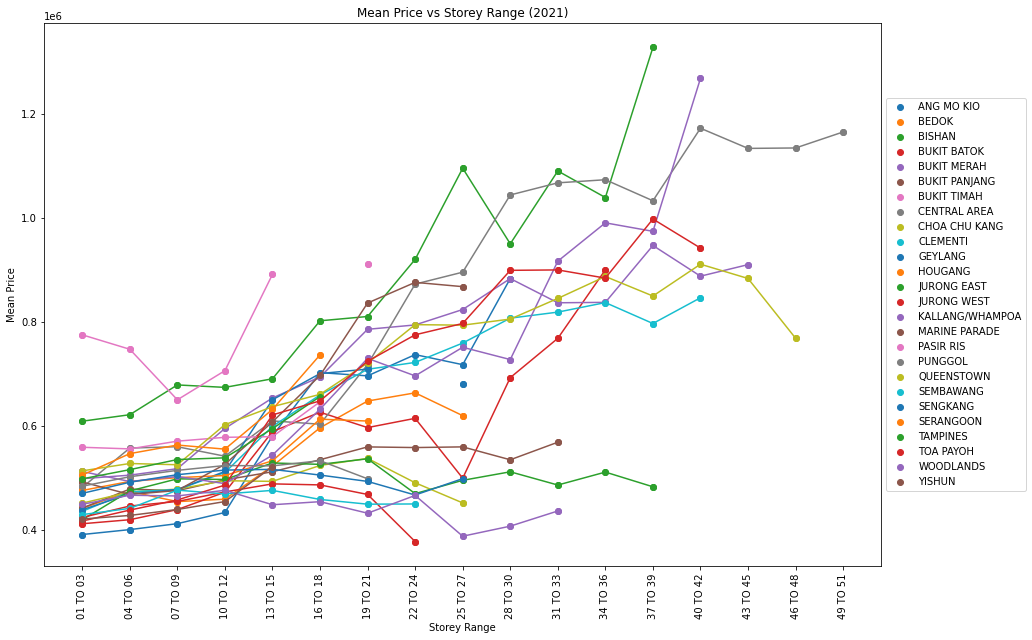

In [10]:
#Getting the storey_range and town graphs
df2021=df.loc[df['ListingByYear']=='2021']
print(df2021['month'].unique())
meanpricebystorey = df2021.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.scatter(newdf.index, newdf[i], label=i)
    plt.plot(newdf.index, newdf[i], '-o')


plt.title('Mean Price vs Storey Range (2021)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2022-04' '2022-01' '2022-02' '2022-03' '2022-05' '2022-06' '2022-07'
 '2022-08' '2022-09' '2022-10' '2022-11' '2022-12']


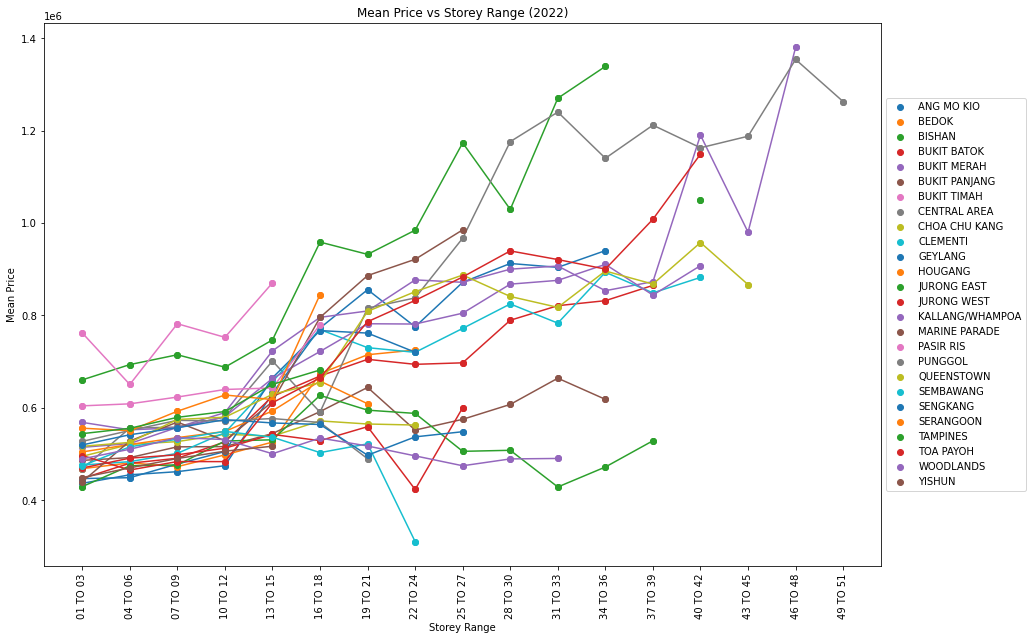

In [11]:
#Getting the storey_range and town graphs
df2022=df.loc[df['ListingByYear']=='2022']
print(df2022['month'].unique())
meanpricebystorey = df2022.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.scatter(newdf.index, newdf[i], label=i)
    plt.plot(newdf.index, newdf[i], '-o')


plt.title('Mean Price vs Storey Range (2022)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2023-02' '2023-01' '2023-03']


<Figure size 432x288 with 0 Axes>

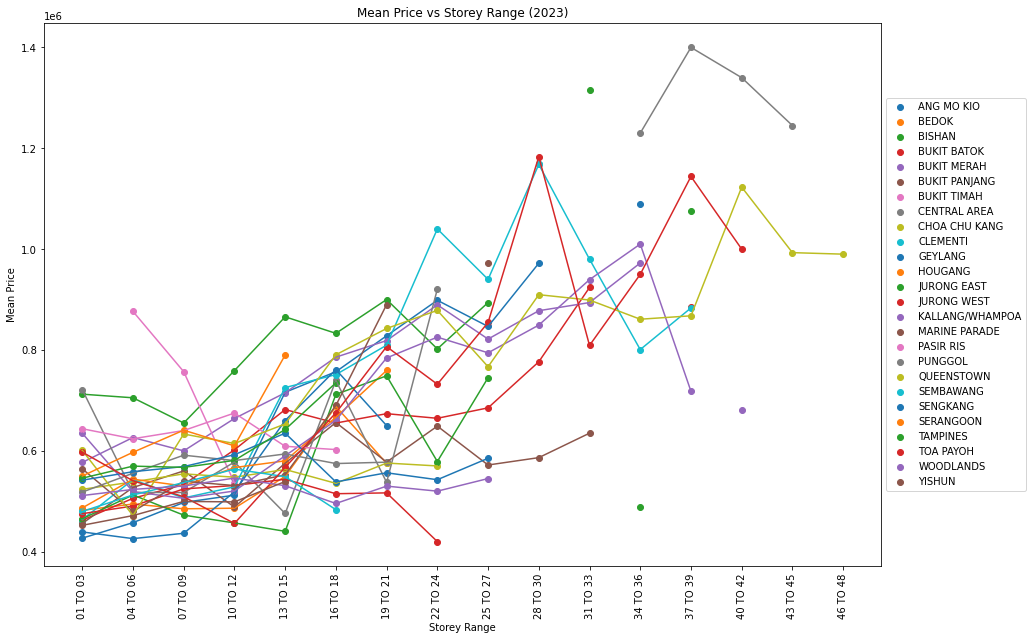

In [12]:
#Getting the storey_range and town graphs
df2023=df.loc[df['ListingByYear']=='2023']
print(df2023['month'].unique())
meanpricebystorey = df2023.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf()
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.plot(newdf.index, newdf[i])
    plt.scatter(newdf.index, newdf[i], label=i)
    


plt.title('Mean Price vs Storey Range (2023)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12']


<Figure size 432x288 with 0 Axes>

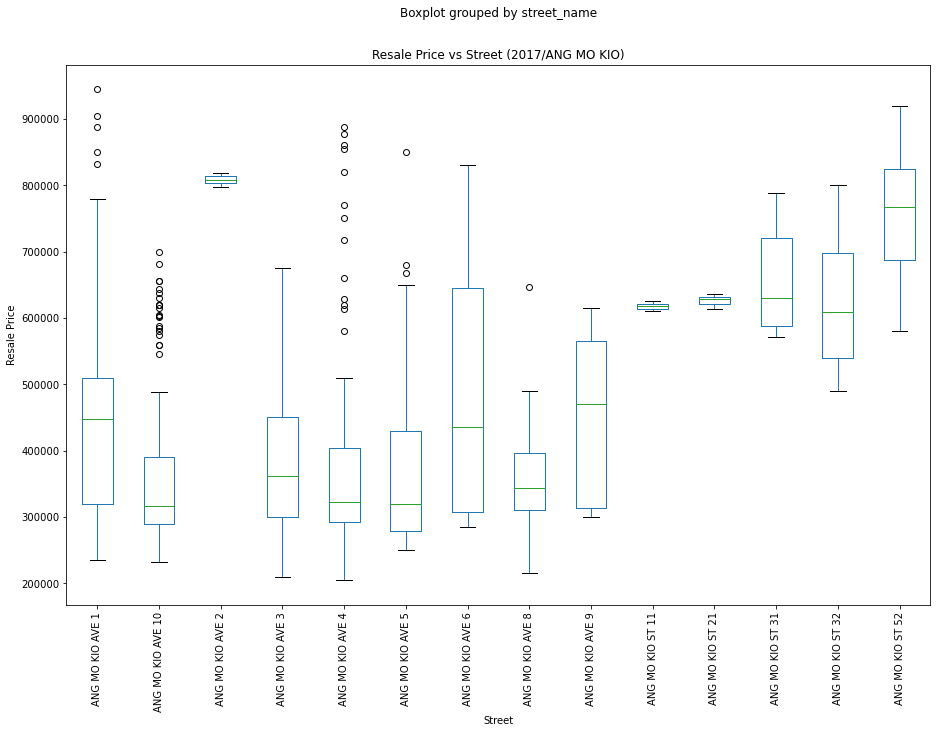

<Figure size 432x288 with 0 Axes>

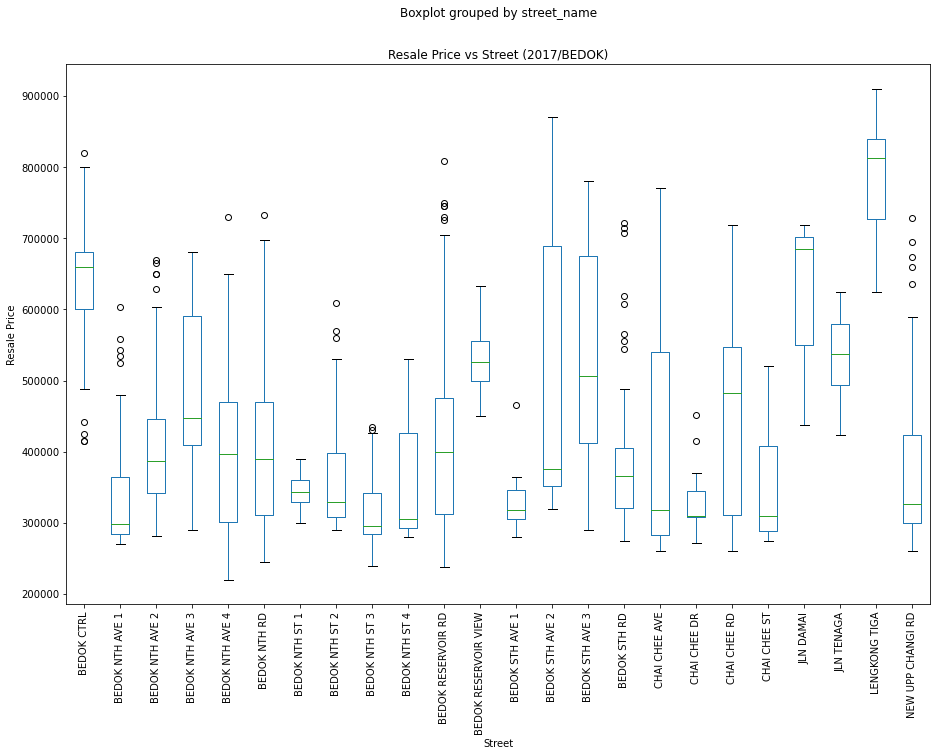

<Figure size 432x288 with 0 Axes>

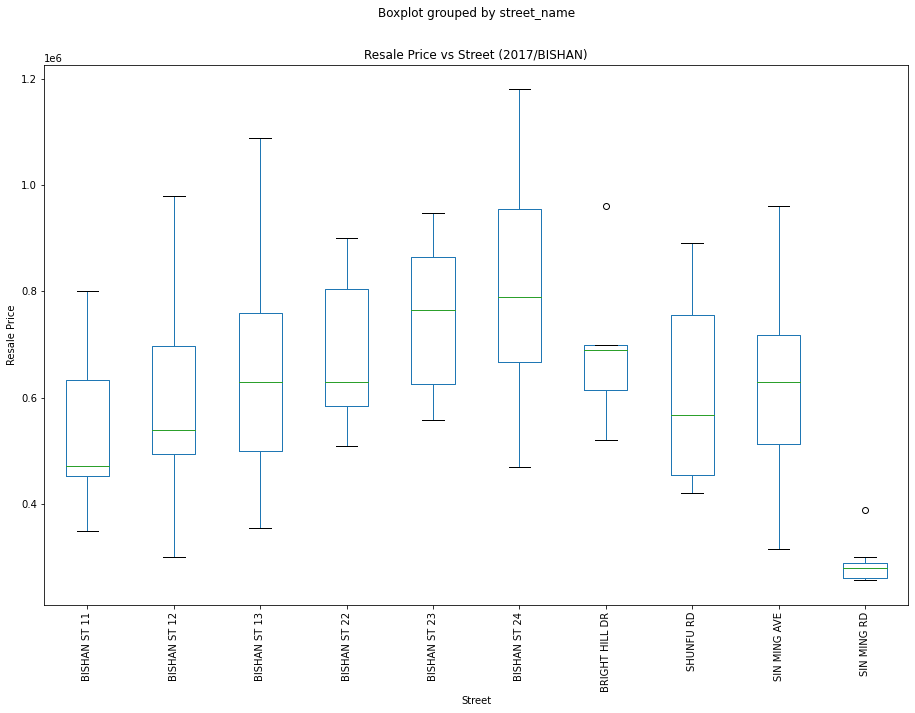

<Figure size 432x288 with 0 Axes>

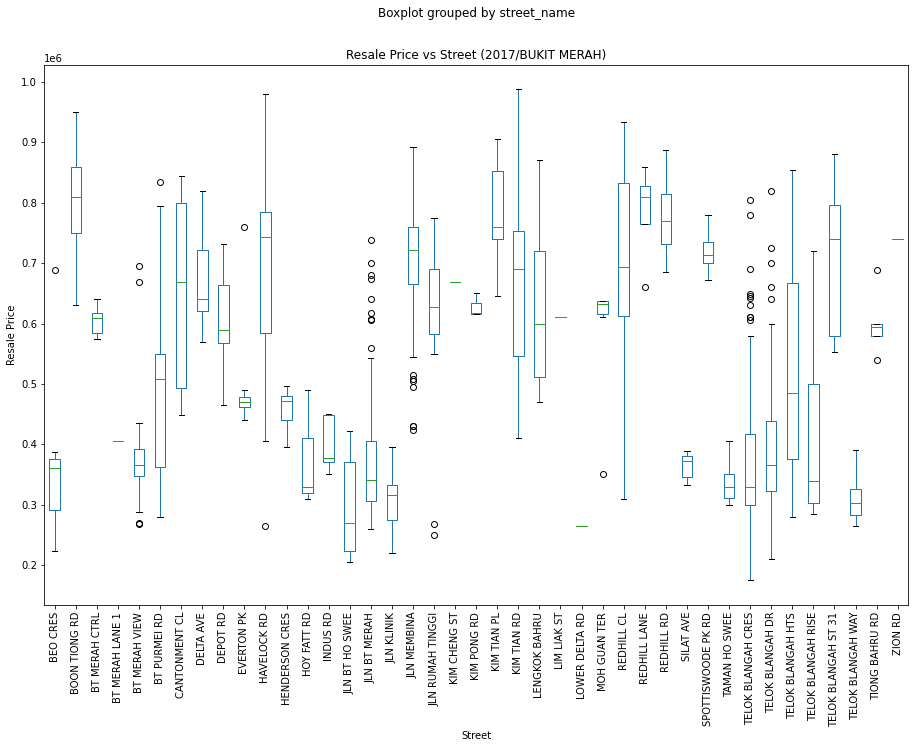

<Figure size 432x288 with 0 Axes>

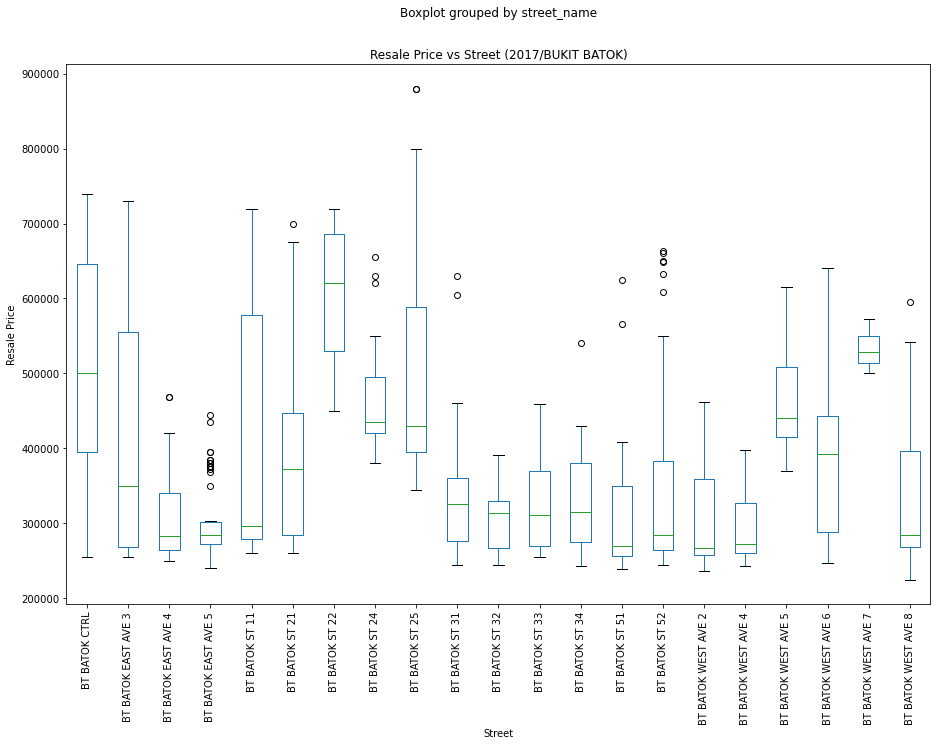

<Figure size 432x288 with 0 Axes>

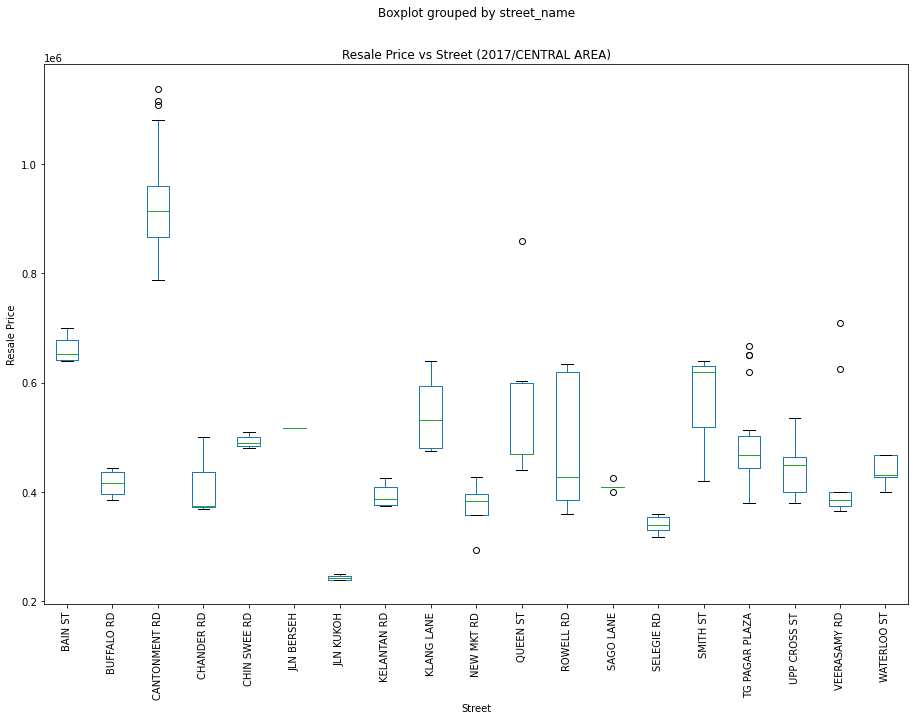

<Figure size 432x288 with 0 Axes>

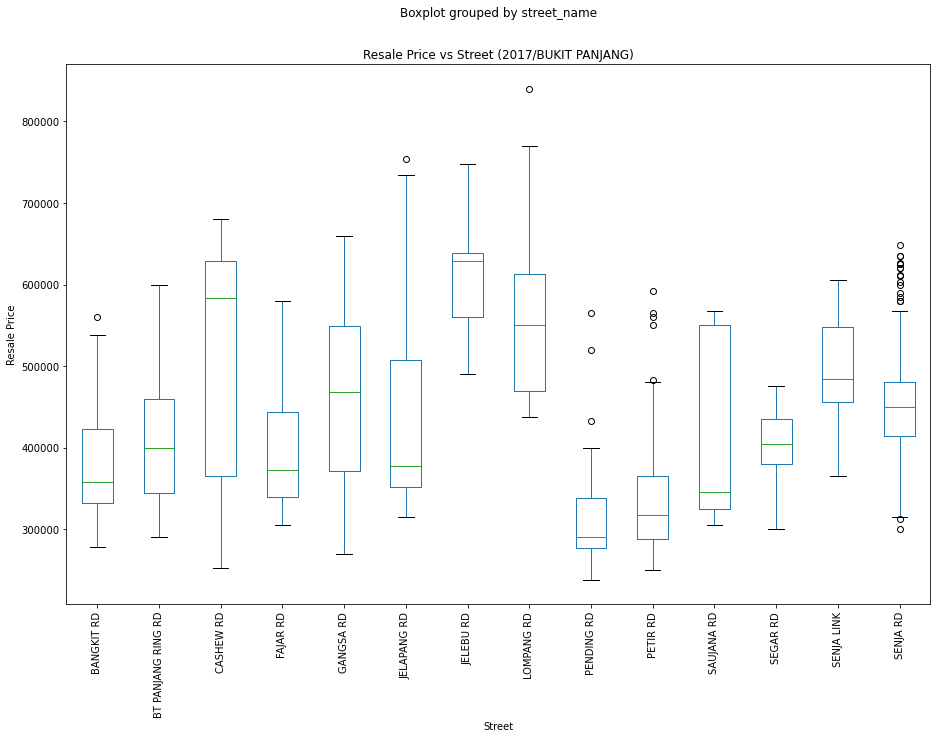

<Figure size 432x288 with 0 Axes>

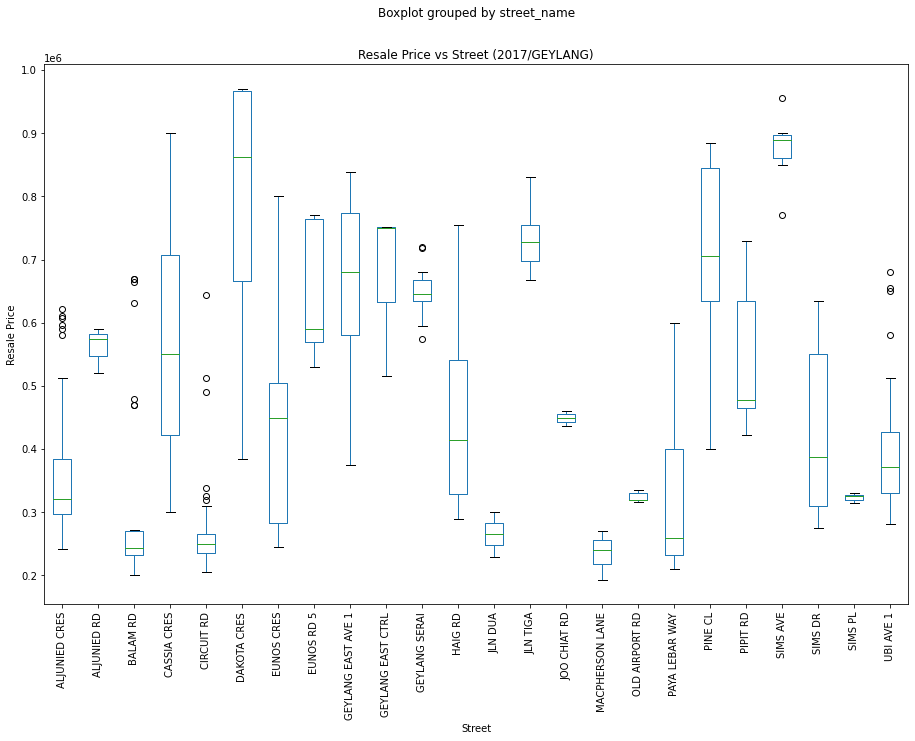

<Figure size 432x288 with 0 Axes>

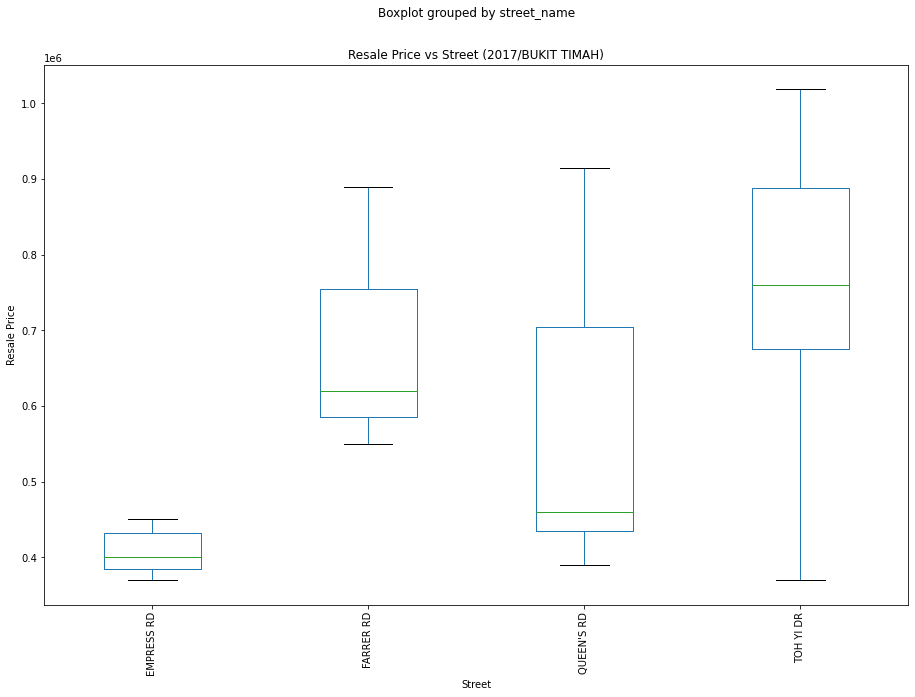

<Figure size 432x288 with 0 Axes>

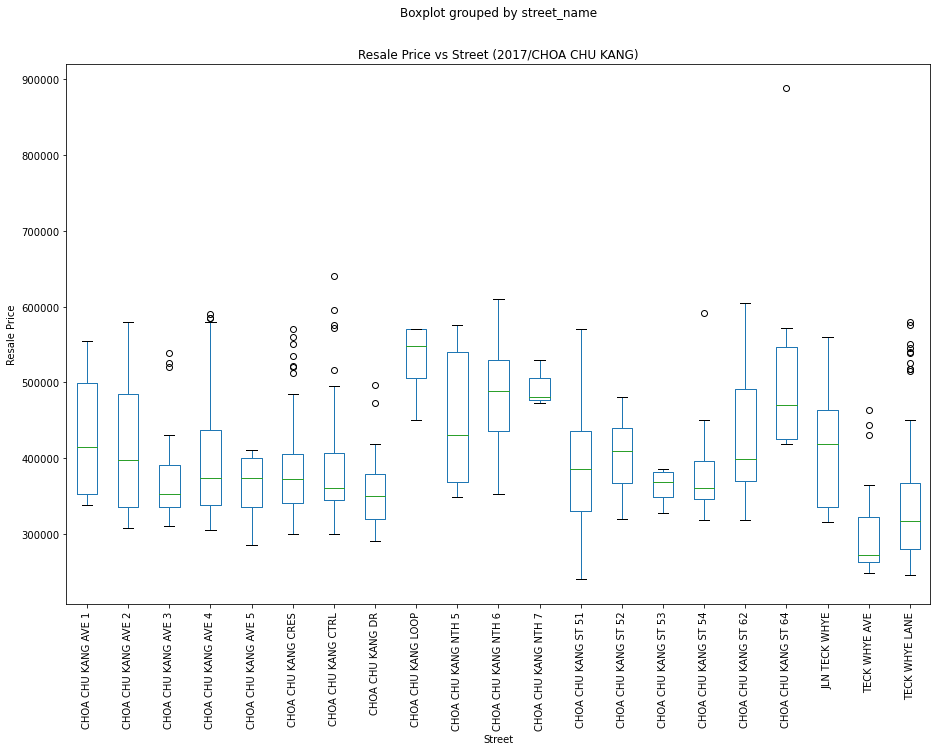

<Figure size 432x288 with 0 Axes>

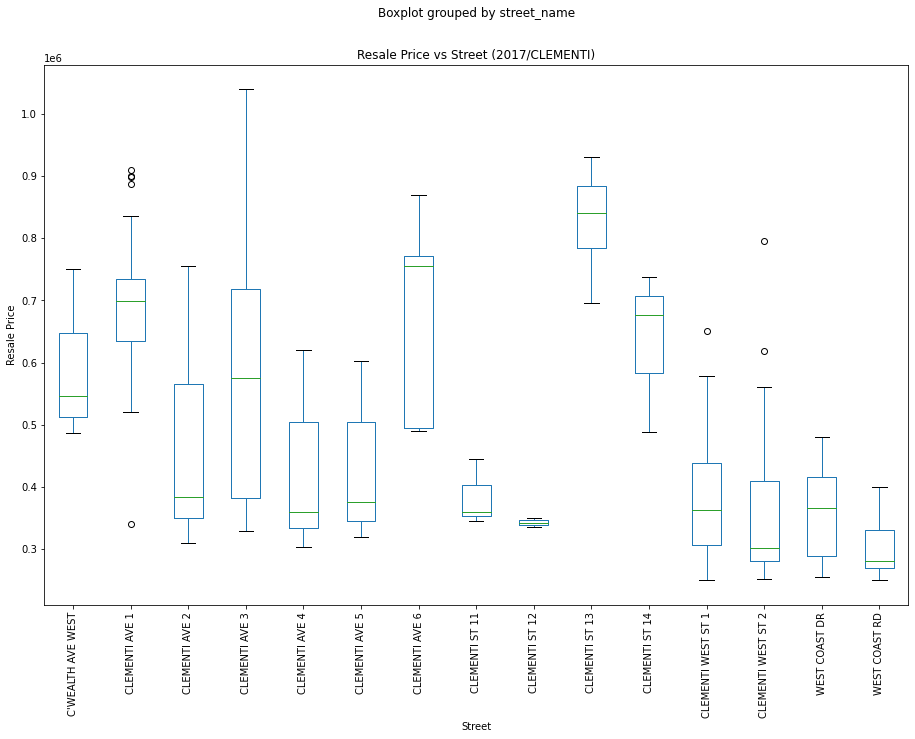

<Figure size 432x288 with 0 Axes>

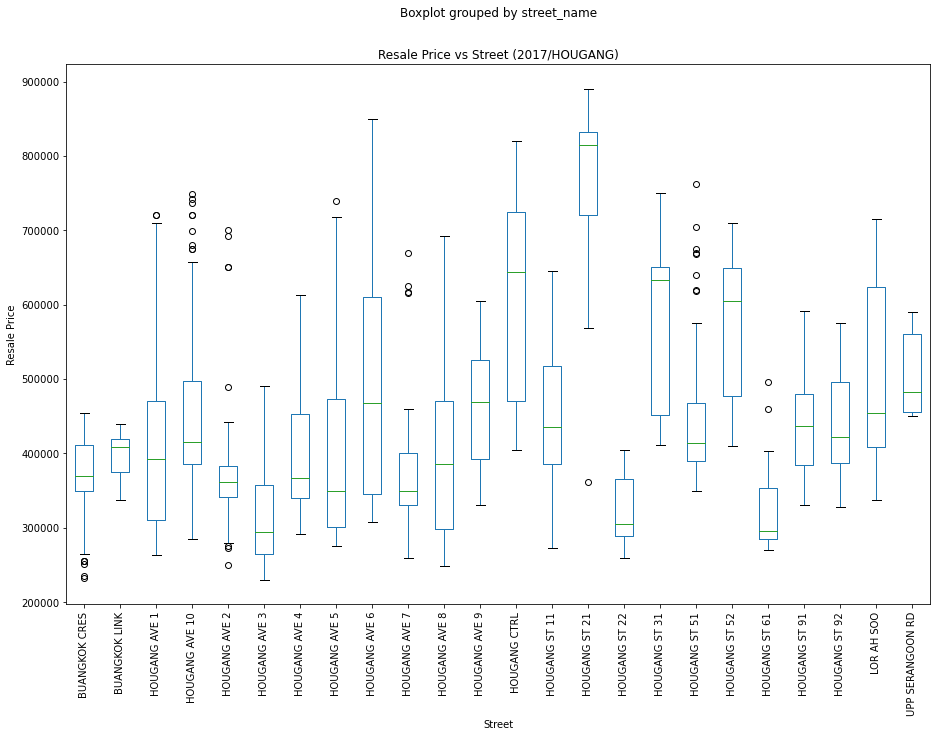

<Figure size 432x288 with 0 Axes>

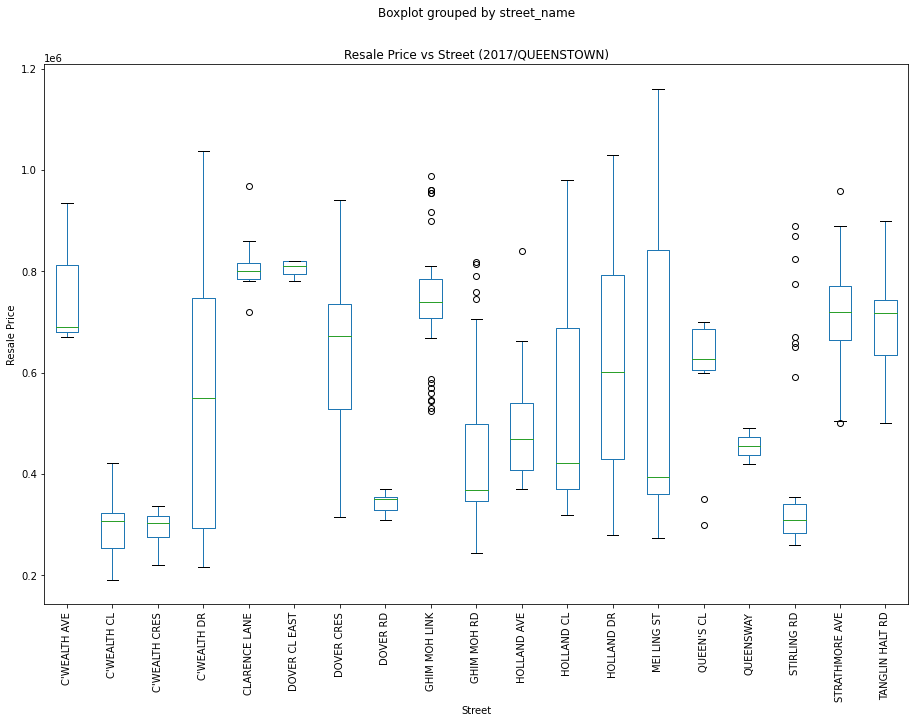

<Figure size 432x288 with 0 Axes>

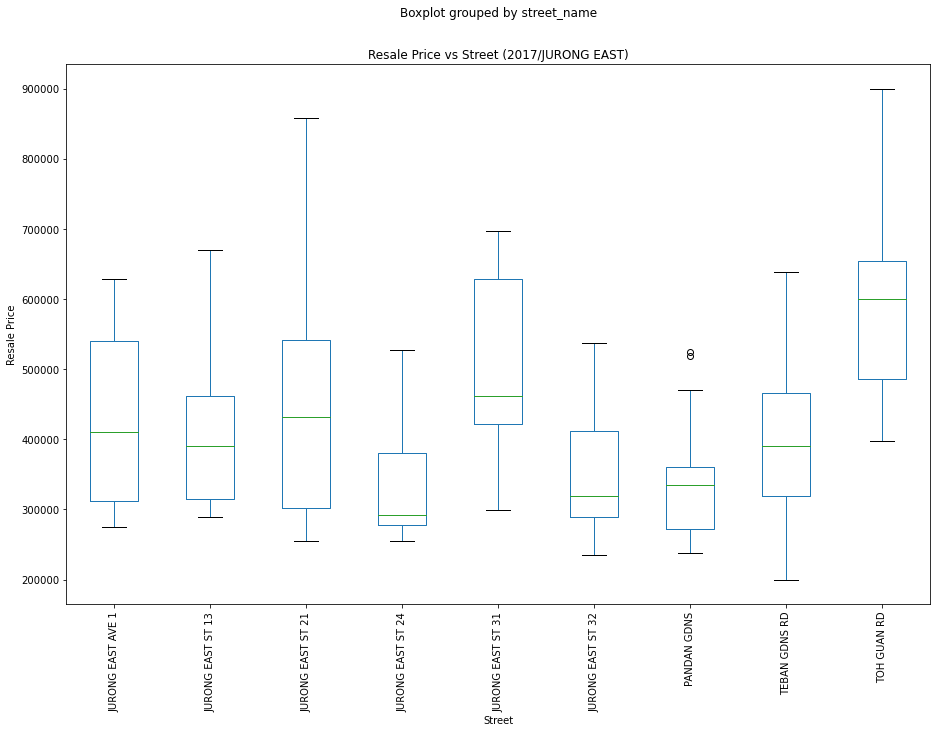

<Figure size 432x288 with 0 Axes>

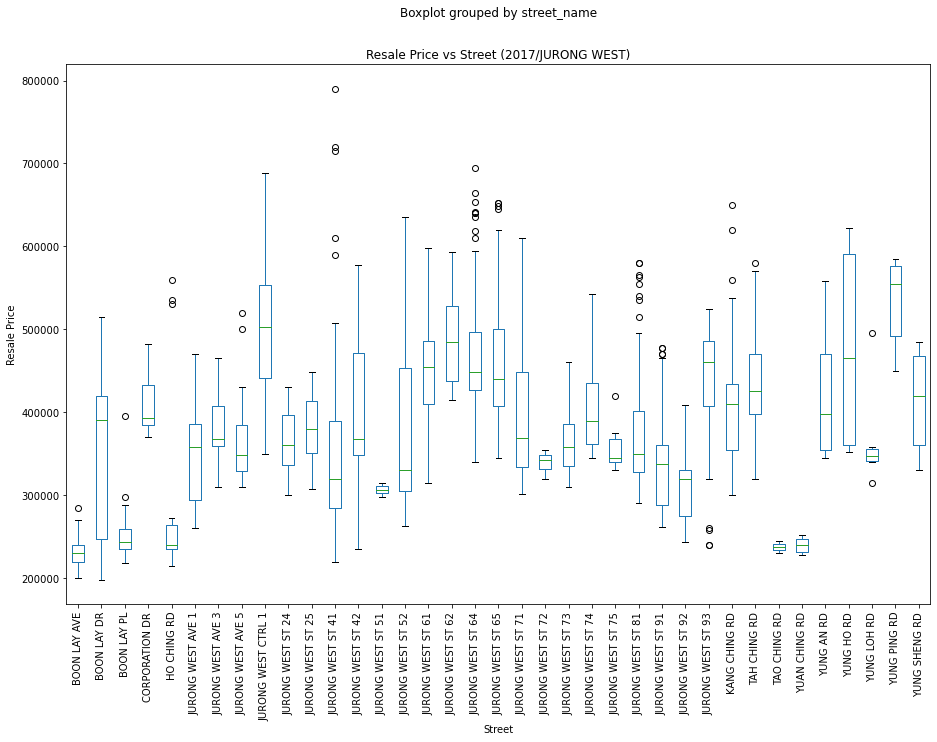

<Figure size 432x288 with 0 Axes>

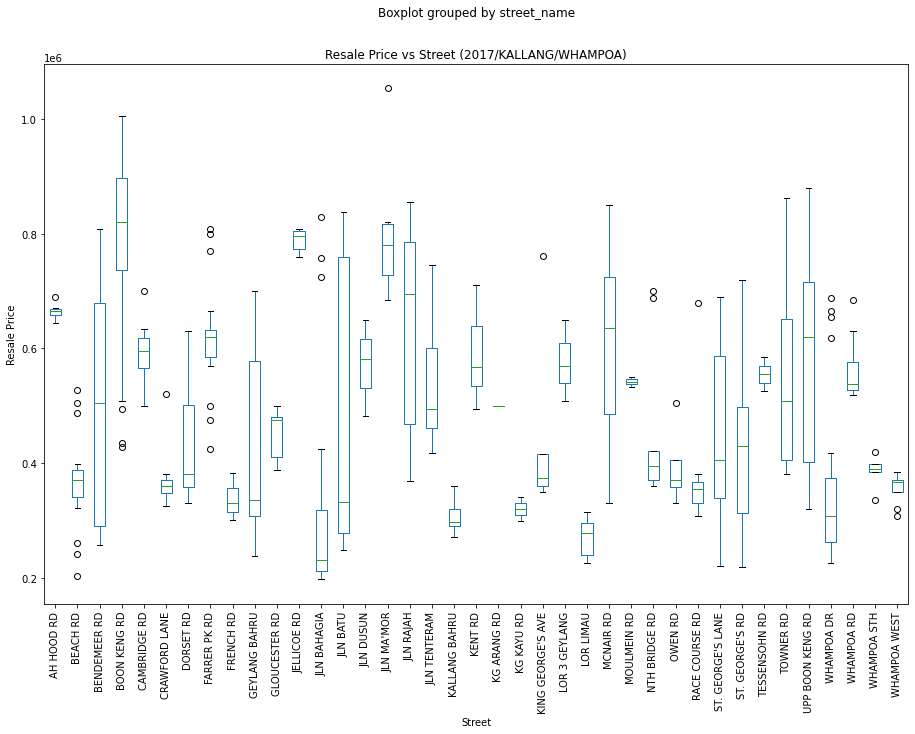

<Figure size 432x288 with 0 Axes>

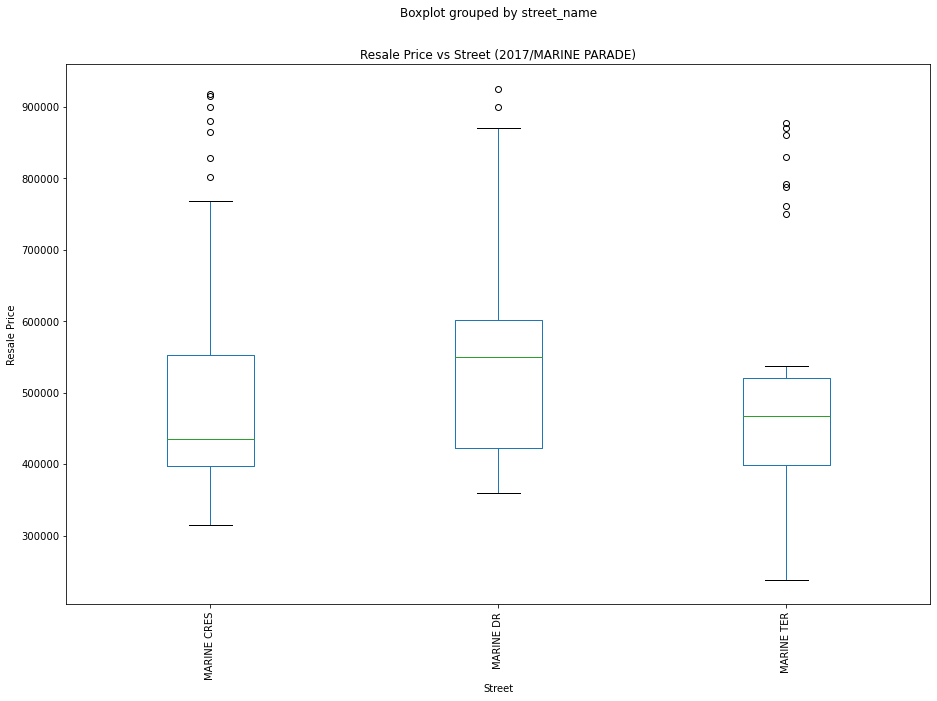

<Figure size 432x288 with 0 Axes>

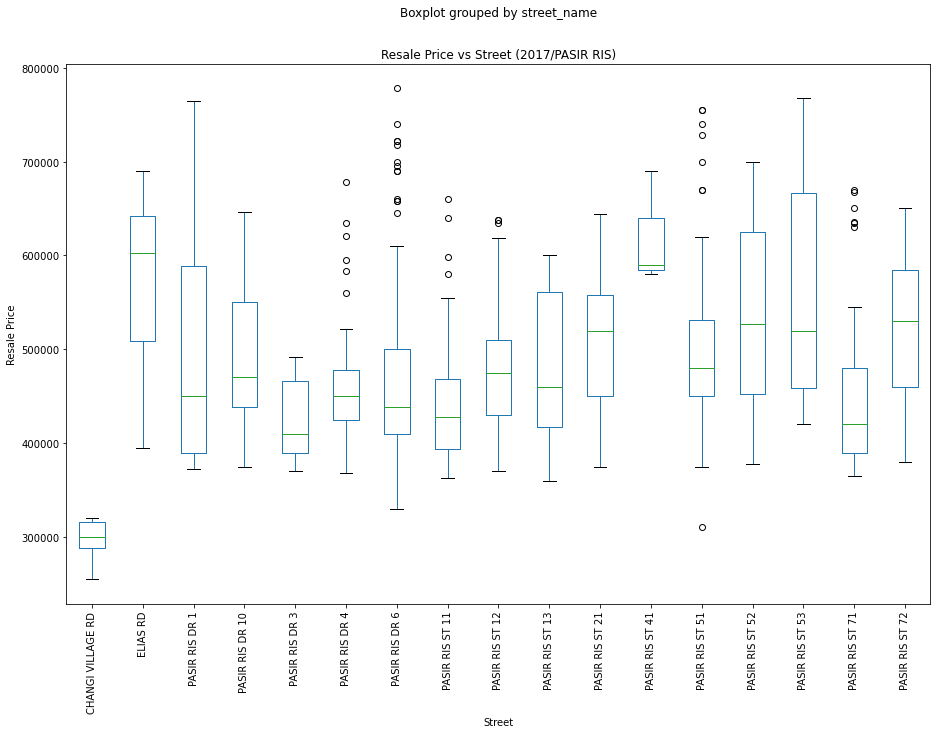

<Figure size 432x288 with 0 Axes>

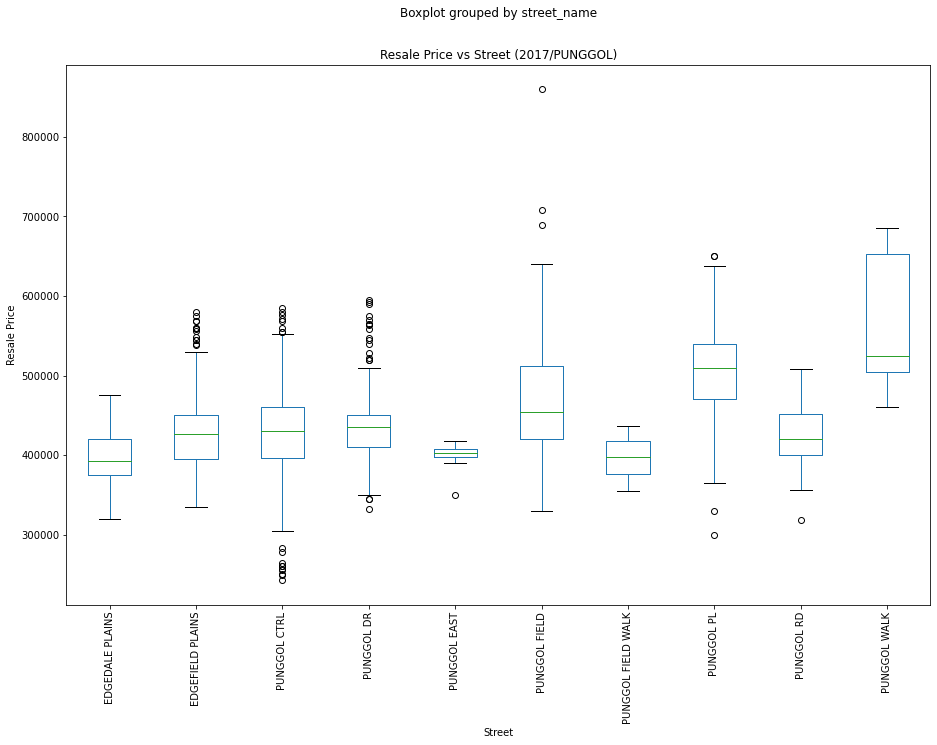

<Figure size 432x288 with 0 Axes>

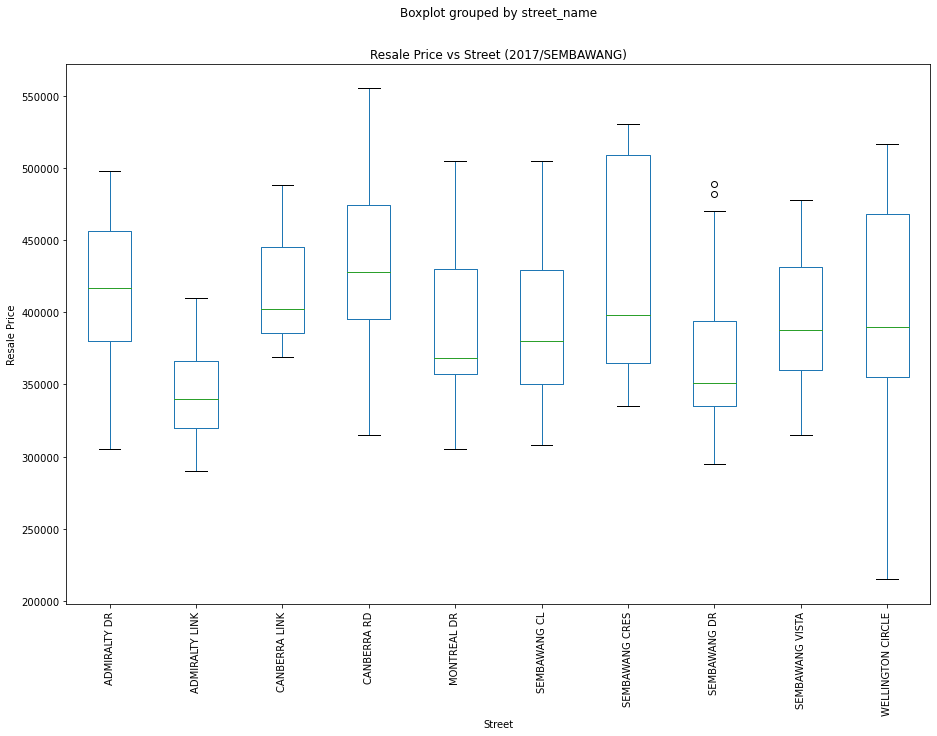

<Figure size 432x288 with 0 Axes>

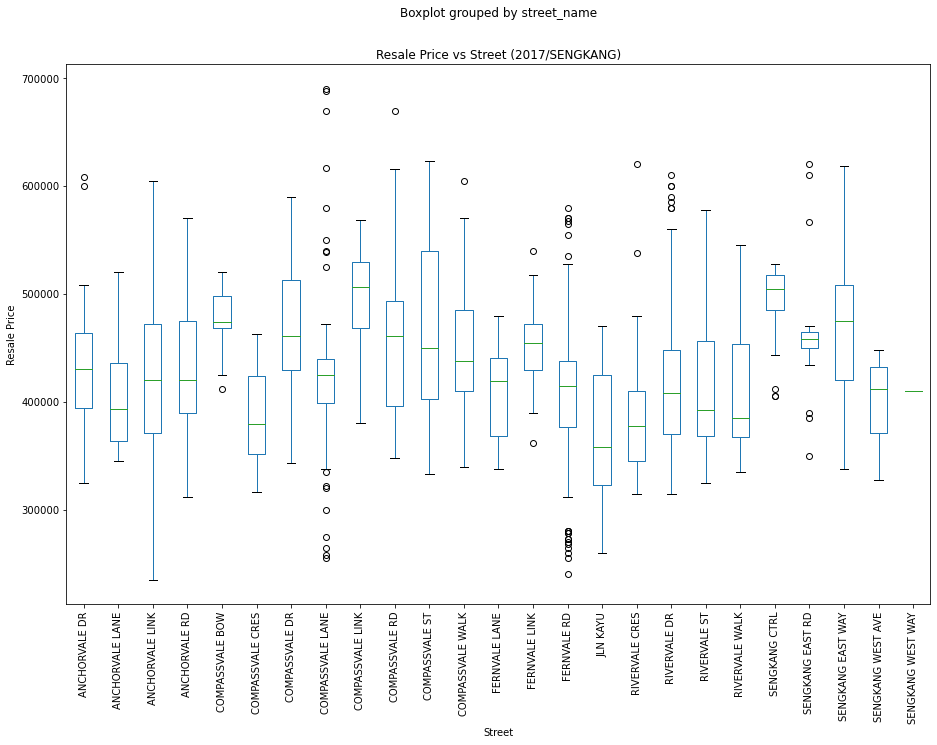

<Figure size 432x288 with 0 Axes>

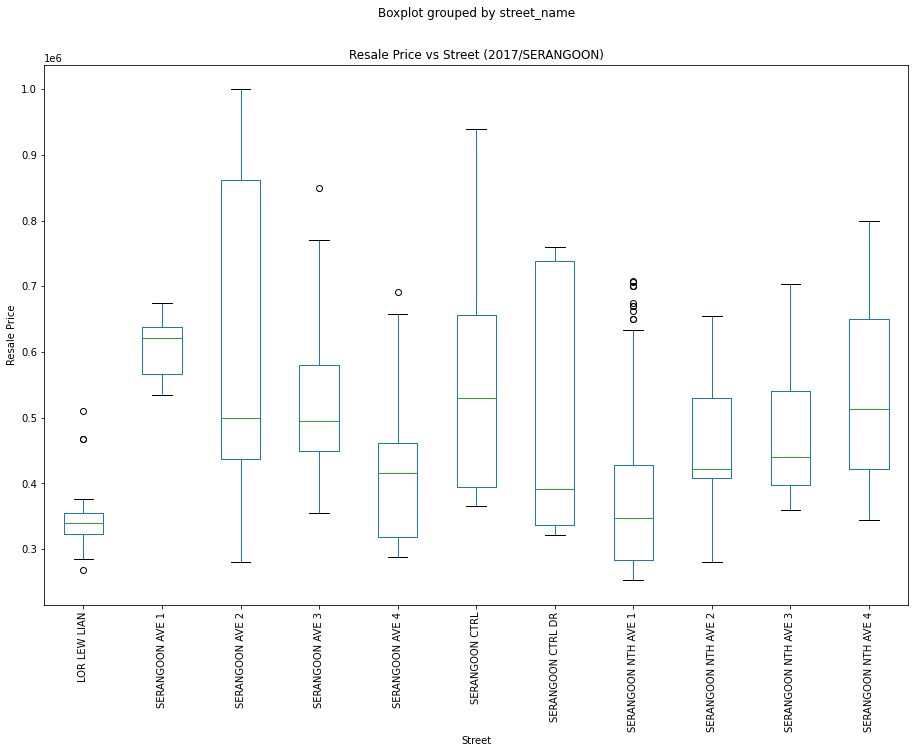

<Figure size 432x288 with 0 Axes>

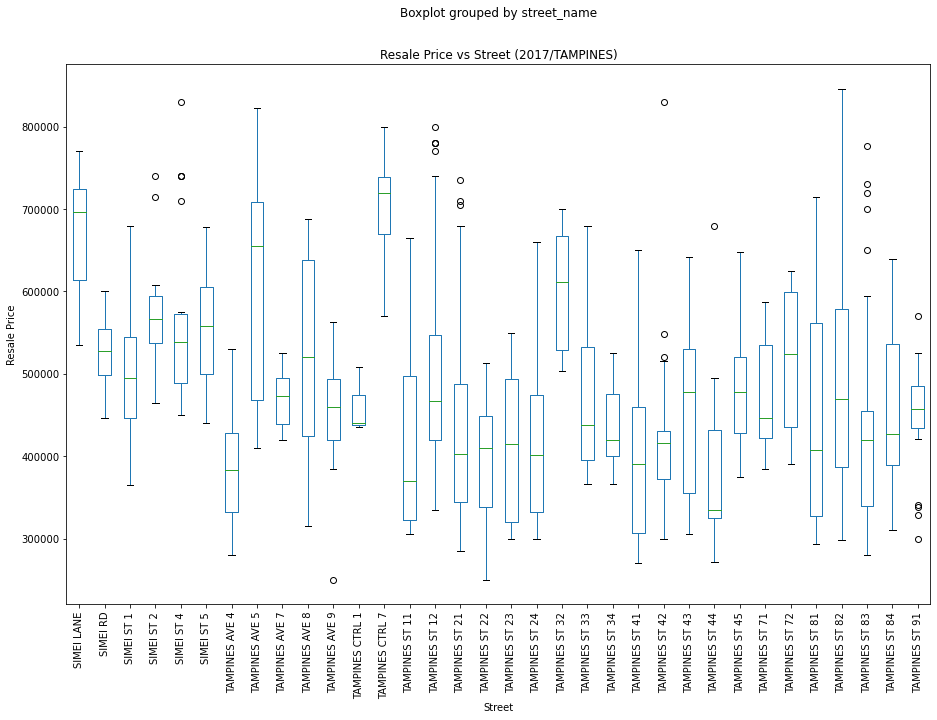

<Figure size 432x288 with 0 Axes>

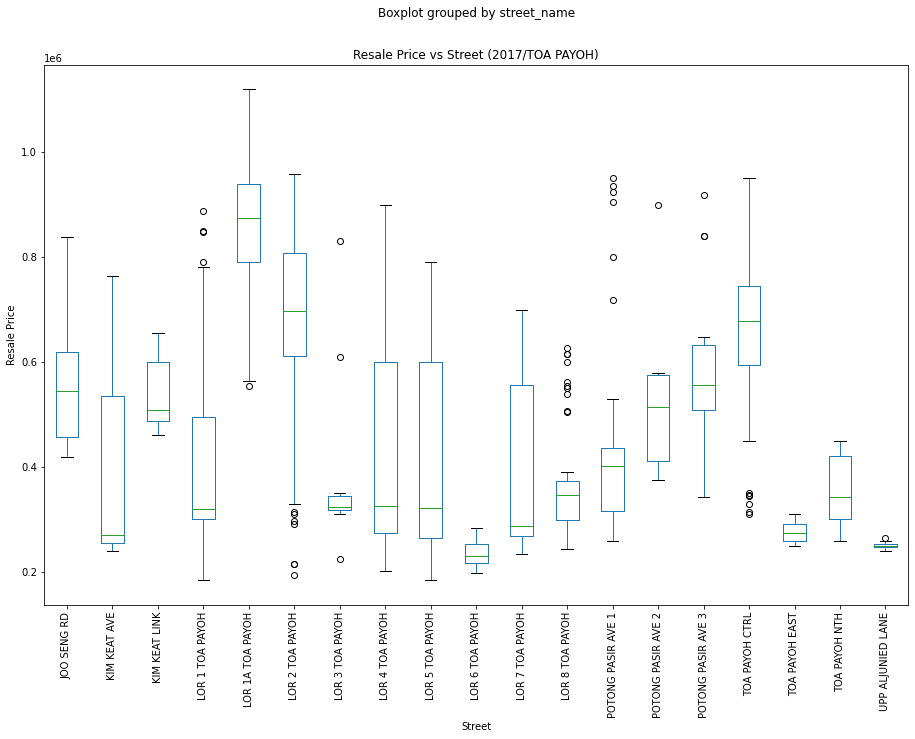

<Figure size 432x288 with 0 Axes>

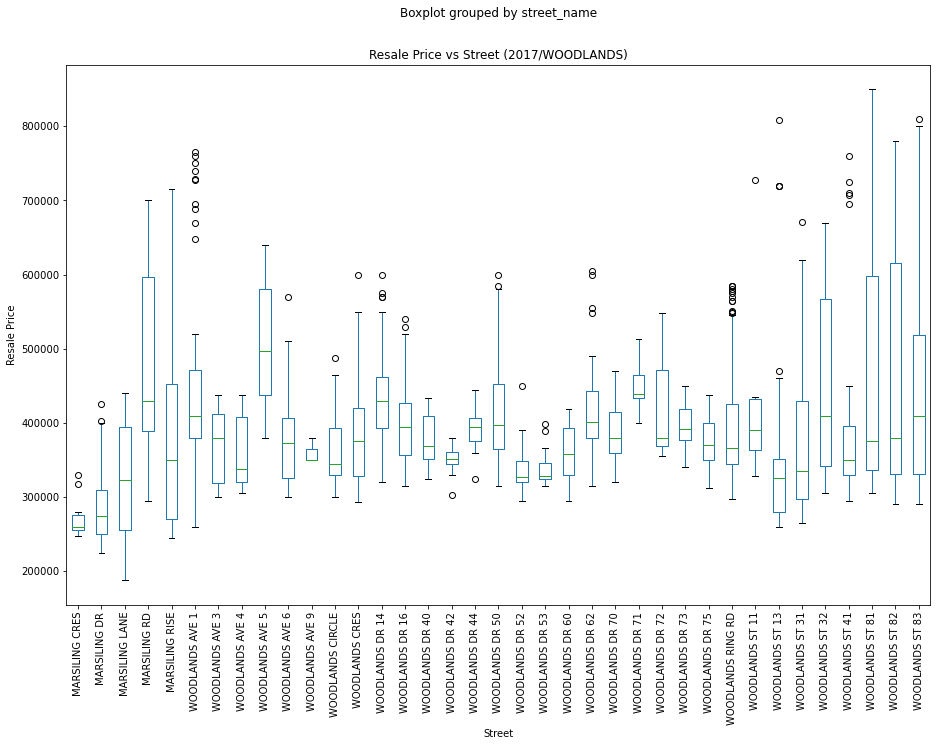

<Figure size 432x288 with 0 Axes>

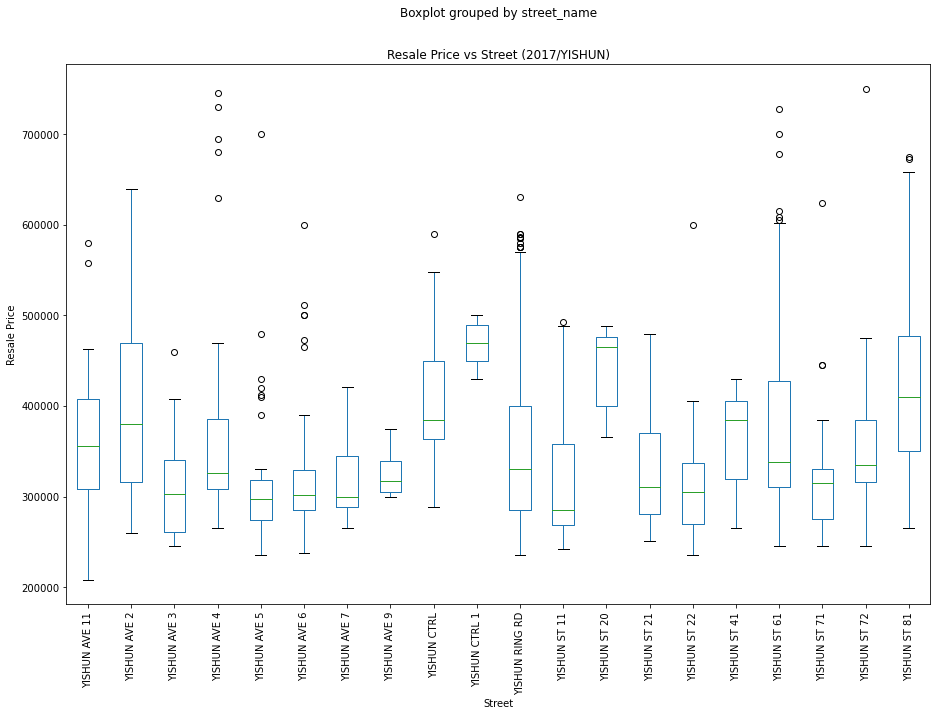

In [31]:
#Getting the street name and town graphs by year
changey={2017:df2017,2018:df2018,2019:df2019,2020:df2020,2021:df2021,2022:df2022, 2023:df2023}
whatyear=2017

y=changey[whatyear]
uniquetown=y['town'].unique()
print(y['month'].unique())

for i in uniquetown:
    bystreetdf=y.loc[df['town']==i] 
#     pricebystreet=bystreetdf.groupby('street_name')
#     display(pricebystreet)
#     newdf=pricebystreet['resale_price']
#     newdf=pricebystreet['resale_price'].unstack(level=1)
#     display(newdf)
    
    #plot the graph
    plt.clf()
    bystreetbp=bystreetdf.boxplot(by ='street_name', column =['resale_price'], grid = False, figsize =(15, 10))
#     plt.scatter(pricebystreet.index,pricebystreet['resale_price'])

    #Put aesthetics on graph
    plt.title(f'Resale Price vs Street ({whatyear}/{i})')
    plt.ylabel('Resale Price')
    plt.xlabel('Street')
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
    plt.xticks(rotation=90)
    plt.show()